# Trabalho T4 - Integração Numérica e Sistemas Lineares

### MTM 224 - Métodos Numéricos Computacionais
### Eng. Química(305) - Turma 14

*Nomes*: Gabriel Righi, 201612819; Júlia Pesarico, 20182064.


---
## Questão 1
Use um programa em Python para integrar numericamente a função $$\int_0^3 x^2 e^x\,dx$$ usando a regra dos trapézios, a regra de 1/3 de Simpson e a regra de 3/8 de Simpson com 12 subintervalos. Compare dos resultados obtidos com a solução exata.

**OBS**: a resolução foi feita em um único arquivo .py para evitar o excesso de código

Xi = [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
Yi = [0.00000000e+00 8.02515885e-02 4.12180318e-01 1.19081251e+00
 2.71828183e+00 5.45366087e+00 1.00838004e+01 1.76234707e+01
 2.95562244e+01 4.80316627e+01 7.61405873e+01 1.18297404e+02
 1.80769832e+02]




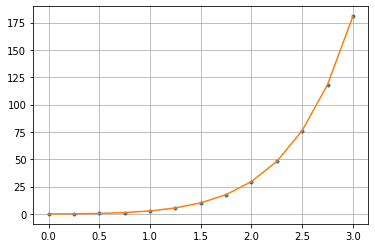

Regra dos Trapézios: 99.99331307969646 

Regra 1/3 de Simpson: 98.44175237978553 

Regra 3/8 de Simpson: 98.458927988704

Valor exato: 98.4276846159383

Erro utilizando a Regra 1/3 de Simpson 0.00014292486816198718


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Intervalos da integração
a = 0
b = 3

#Número de subintervalos
n = 12

#Tamanho de cada subintervalo
h = (b-a)/n

#Integral dada no exercício
def f(x):
    return (x**2)*((np.e)**x)

#Criando n+1 pontos igualmente espaçados
X = np.linspace(a, b, n+1)
Y = f(X)

print("Xi =", np.round(X,4))
print("Yi =", f(X))
print("\n")

#Grafico da função do exercício
plt.plot(X, Y, ".", X, f(X), "-") 
plt.grid()
plt.show()

#Regra dos trapézios
It = (h/2)*(f(X[0]) + 2*np.sum(f(X[1:n:1])) + f(X[-1]))
print("Regra dos Trapézios:", It, "\n")

#Regra 1/3 de Simpson
I1_3 = (h/3)*(f(X[0]) + 4*np.sum(f(X[1:n:2])) + 2*np.sum(f(X[2:n:2]))+ f(X[-1]))
print("Regra 1/3 de Simpson:", I1_3,"\n")

#Regra 3/8 de Simpson
I3_8 = (3*h/8)*(f(X[0]) + 3*np.sum(f(X[1:n:3])+f(X[2:n:3])) + 2*np.sum(f(X[3:n:3]))+ f(X[-1]))
print("Regra 3/8 de Simpson:", I3_8)

valor_exato = 98.4276846159383
print("\nValor exato:", valor_exato)

err = abs(valor_exato - I1_3)/abs(valor_exato)
print("\nErro utilizando a Regra 1/3 de Simpson",err)

**Observações obtidas:** Como é possível perceber pelos valores encontrados utilizando as 3 fórmulas, A Regra dos Trapézios é a que mais se distancia das demais, enquanto que o erro entre a Regra 1/3 de Simpson e 3/8 de Simpson é próxima de $10^{-2}$.
Porém, utilizando o site do WolframAlpha, foi possível encontrar o valor exato para a equação como sendo _98.4276846159383_. Assim, para esse caso, a regra que mais se aproxima do valor exato é a Regra 1/3 de Simpson.

---
## Questão 2
A massa total de uma haste de densidade variável é dada por $$m = \int_0^L p(x) Ac(x)\,dx$$ em que $m$ é a massa, $p(x)$ é a densidade, $Ac(x)$ é a área da seção transversal, $x$ é distância ao longo da haste e $L$ é o comprimento total da haste. Os seguintes dados foram medidos para uma haste de 12m. Determine a massa em quilogramas usando integração numéria
com as regras de 1/3.

De acordo com os dados da tabela disponíveis do .pdf do trabalho, podemos resolver da seguinte forma:

In [8]:
import numpy as np

#Intervalos da integração
a = 0
b = 12

#Número de subintervalos
n = 6

#Tamanho de cada subintervalo
h = (b-a)/n

#Valores da tabela disponibilizados em arrays
p = np.array([4.00, 3.95, 3.80, 3.60, 3.41, 3.30, 3.20])
Ac = np.array([100, 103, 110, 120, 133, 150, 171])

#Calculo de m de acordo com a regra 1/3 de Simpson generalizada
I = (h/3)*((p[0]*Ac[0]) + 4*np.sum(p[1:n:2]*Ac[1:n:2]) + 2*np.sum(p[2:n:2]*Ac[2:n:2])+ (p[-1]*Ac[-1]))

print("O valor da massa em quilogramas é:", I/1000)

O valor da massa em quilogramas é: 5.350439999999999


**Observações obtidas:** Setando os valores em arrays e aplicando a regra 1/3 de Simpson generalizada, foi possível obter o valor aproximado da massa em gramas. Assim, dividindo o valor por $10^{3}$, encontramos o valor em kg como foi solicitado na questão.

---
## Questão 4
Use um programa em Python para resolver o sistema disponibilizado no arquivo .pdf, utilizando decomposição
LU, mostrando as matrizes L e U. Em seguida, use os programas apresentados em aula para resolver esse mesmo sistema
por eliminação de Gauss e por algum método iterativo. Compare os resultados e comente.

In [2]:
import numpy as np
from numpy import dot

#Função que retorna as matrizes L e U
def fatoracao_LU(A):
    n = len(A)     
    U = np.zeros((n,n))
    L = np.identity(n)
    for m in range(n):
        for j in range(m, n):
            U[m,j] = A[m,j] - np.sum(L[m,0:m] * U[0:m,j])
        for i in range(m+1, n):
            L[i,m] = (A[i,m] - np.sum(L[i,0:m] * U[0:m,m]))/U[m,m]
    return L,U

A = np.array([[6.1,0.32,1.3,2.1,0.11,19.52],
              [0.82,8.81,1.01,3.,3.12,15.83],
              [0.5,1.78,15.2,4.2,8.1,-22.14],
              [4.2,5.3,1.8,20.9,7.51,27.28],
              [0.2,9.1,4.68,4.3,20.1,-21.78]])

L,U = fatoracao_LU(A)
print ("Matriz L:")
print (np.array(L), "\n")
print ("Matriz U:")
print(np.array(U), "\n\n ----------------- \n Método da Eliminação de Gauss:")

#Função para executar a eliminação de Gauss
def gaussElimin(a,b): 
    n = len(b) 
    for k in range(0,n-1): 
        for i in range(k+1,n): 
            if a[i][k] != 0.0: 
                lam = a [i][k]/a[k][k] 
                a[i][k+1:n] = a[i][k+1:n] - lam*a[k][k+1:n] 
                b[i] = b[i] - lam*b[k] 
    for k in range(n-1,-1,-1): 
        b[k] = (b[k] - dot(a[k][k+1:n],b[k+1:n]))/a[k][k] 
    return b

#A mesma matriz anterior, mas dessa vez, foi separada a Matriz A da matriz b
A = np.array([[6.1,0.32,1.3,2.1,0.11],
              [0.82,8.81,1.01,3.,3.12],
              [0.5,1.78,15.2,4.2,8.1],
              [4.2,5.3,1.8,20.9,7.51],
              [0.2,9.1,4.68,4.3,20.1]])
    
b = np.array([19.52, 15.83, -22.14, 27.28, -21.78])

print (gaussElimin(A,b), "\n\n ---------------- \n Metodo iterativo Jacobi-Richardson")

#A mesma matriz da questão
N = np.array([[6.1,0.32,1.3,2.1,0.11,19.52],
              [0.82,8.81,1.01,3.,3.12,15.83],
              [0.5,1.78,15.2,4.2,8.1,-22.14],
              [4.2,5.3,1.8,20.9,7.51,27.28],
              [0.2,9.1,4.68,4.3,20.1,-21.78]])

x = [0,0,0,0,0]

x1 = lambda x2, x3, x4, x5: (N[0][5] -N[0][1]*x2 -N[0][2]*x3 -N[0][3]*x4 -N[0][4]*x5)/N[0][0]
    
x2 = lambda x1, x3, x4, x5: (N[1][5] -N[1][0]*x1 -N[1][2]*x3 -N[1][3]*x4 -N[1][4]*x5)/N[1][1]

x3 = lambda x2, x1, x4, x5: (N[2][5] -N[2][0]*x1 -N[2][1]*x2 -N[2][3]*x4 -N[2][4]*x5)/N[2][2]

x4 = lambda x2, x3, x1, x5: (N[3][5] -N[3][0]*x1 -N[3][1]*x2 -N[3][2]*x3 -N[3][4]*x5)/N[3][3]
    
x5 = lambda x2, x3, x4, x1: (N[4][5] -N[4][0]*x1 -N[4][1]*x2 -N[4][2]*x3 -N[4][3]*x4)/N[4][4]


for k in range(100):
     x = [x1(x[1],x[2],x[3],x[4]), x2(x[0],x[2],x[3],x[4]), x3(x[0],x[1],x[3],x[4]), x4(x[0],x[1],x[2],x[4]), x5(x[0],x[1],x[2],x[3])]
print ("(%.4f,"%x[0],"%.4f,"%x[1],"%.4f,"%x[2],"%.4f,"%x[3],"%.4f)"%x[4])

Matriz L:
[[1.         0.         0.         0.         0.        ]
 [0.13442623 1.         0.         0.         0.        ]
 [0.08196721 0.20004263 1.         0.         0.        ]
 [0.68852459 0.57940933 0.02820305 1.         0.        ]
 [0.03278689 1.03678855 0.25266738 0.02998203 1.        ]] 

Matriz U:
[[ 6.1         0.32        1.3         2.1         0.11      ]
 [ 0.          8.76698361  0.8352459   2.71770492  3.10521311]
 [ 0.          0.         14.92635783  3.484212    7.4698086 ]
 [ 0.          0.          0.         17.78116937  5.42440148]
 [ 0.          0.          0.          0.         14.82693256]] 

 ----------------- 
 Método da Eliminação de Gauss:
[ 3.  2. -1.  1. -2.] 

 ---------------- 
 Metodo iterativo Jacobi-Richardson
(2.7914, 2.0490, -0.8639, 1.5486, -2.6550)


**Observações**: Como é possível verificar, o método iterativo de Jacobi-Richardson se faz mais preciso. Como é possível perceber, o método da Eliminação de Gauss disponibilizou apenas números com precisão de uma casa decimal, enquanto que o método de Jacobi-Richardson disponibilizou valores mais precisos. Vale destacar os valores que mais variaram entre os dois métodos, sendo x1, x4 e x5.

---
## Questão 5
O método das diferenças finitas transforma a equação diferencial ordinária
$$y^{n} + x^{2}y^{'} - 4xy = 0, x ∈ [0,1]$$
$$y(0) = 0, y(1) = 5$$
em um sistema de equações lineares da forma

$(2 - k^{2}h^{3})_{yk-1} - 4(1+2kh^{3})_{yk} + (2 + k^{2}h^{3})_{yk+1} = 0$

com $k = 1,2,...,(n-1), h = 1/n, y_{0} = 0 e y_{n} = 5.$

Sabendo disso, faça $n = 5$ e monte o sistema linear associado. Então, resolva numericamente o usando algum método iterativo e compare a solução numérica com a solução analítica exata 
$y(x) = x^{4} + 4x.$

In [6]:
import numpy as np

#Define os valores das marizes e cria uma matriz x auxiliar com todos os termos setados em 0 
A = np.array([[-4.604,2.008,0.,0.],
              [1.968,-4.192,2.032,0.],
              [0,1.928,-4.192,2.072],
              [0.,0.,1.872,-4.256]])

b = np.array([0,0,0,-10.64])

x = np.array([0.,0.,0.,0.])
#Faz uma cópia da matriz x
x_ant = x.copy()


n = len(A)
#calcula o valor de x[i]
for k in range(30):
    for i in range(n):
        x[i] = (b[i] - np.dot(A[i,0:i],x[0:i])-np.dot(A[i,i+1:n],x[i+1:n]))/A[i,i]

it = 0
while(it < len(x)):
    #printa valor de y(i)
    print("y",it,"=",np.around(x[it],4),)
    it = it+1

def y(x):
    return x**4 + 4*x

X = np.array([0.8082, 1.6358, 2.5403, 3.6173])
it = 0.2
k = 0
while(it <= 0.8):
    a = X[k]
    b = y(it)
    print("x =", np.round(it,1), "valor real:", np.round(b,4), ",aproximação:",a,",erro absoluto:", abs(b-a))
    it = it+0.2
    k = k+1

y 0 = 0.6541
y 1 = 1.4996
y 2 = 2.4603
y 3 = 3.5822
x = 0.2 valor real: 0.8016 ,aproximação: 0.8082 ,erro absoluto: 0.006599999999999939
x = 0.4 valor real: 1.6256 ,aproximação: 1.6358 ,erro absoluto: 0.010199999999999765
x = 0.6 valor real: 2.5296 ,aproximação: 2.5403 ,erro absoluto: 0.010699999999999488
x = 0.8 valor real: 3.6096 ,aproximação: 3.6173 ,erro absoluto: 0.007699999999999818


**Observações**: é possível perceber discrepâncias nos valores obtidos, se comparados com os dados encontrados pela solução analítica exata. Porém, o erro é bem pequeno, onde o maior erro está próximo de $10^{-2}$